In [1]:
import numpy as np
import matplotlib.pyplot as plt

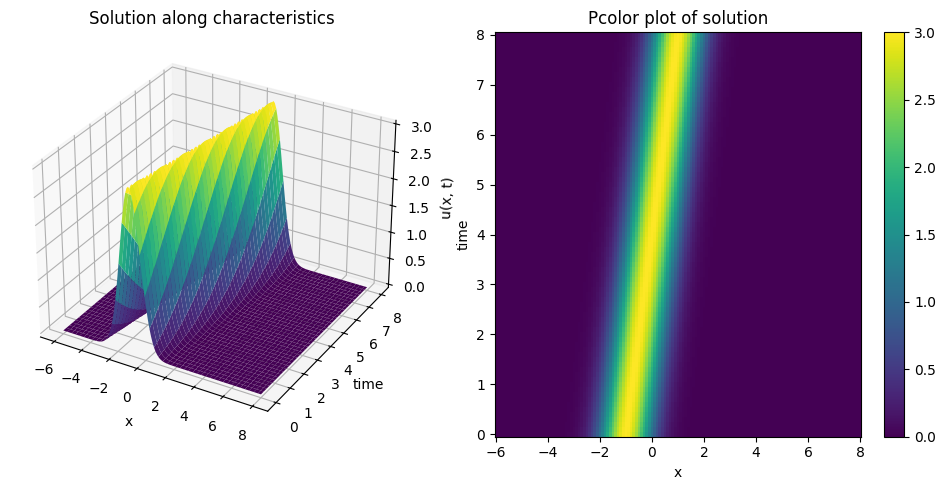

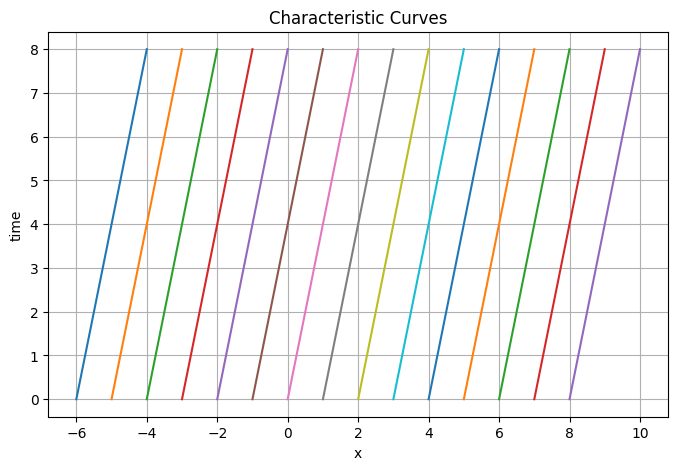

In [8]:
# Initial function
def initial_function(x):
    return 3 * np.exp(-(x + 1) ** 2)

# Characteristic speed
c = 1/4

# Define analytic solution u(x, t) = f(x - c*t)
def analytic_solution(x, t):
    return initial_function(x - c * t)

def solve_transport_with_characteristics():
    # Define spatial and temporal grids
    t = np.arange(0, 8.1, 0.1)
    x = np.arange(-6, 8.1, 0.1)
    X, T = np.meshgrid(x, t)

    # Compute analytic solution over the mesh
    Z = analytic_solution(X, T)

    # Surface plot of the solution
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(121, projection='3d')
    ax.plot_surface(X, T, Z, cmap='viridis')
    ax.set_xlabel("x")
    ax.set_ylabel("time")
    ax.set_zlabel("u(x, t)")
    ax.set_title("Solution along characteristics")

    # Pcolor plot
    plt.subplot(122)
    plt.pcolormesh(X, T, Z, shading='auto', cmap='viridis')
    plt.xlabel("x")
    plt.ylabel("time")
    plt.title("Pcolor plot of solution")
    plt.colorbar()
    plt.tight_layout()
    plt.show()

    # Characteristic curves x = x0 + c * t
    x0_vals = np.arange(-6, 9, 1)
    plt.figure(figsize=(8, 5))
    for x0 in x0_vals:
        plt.plot(x0 + c * t, t, label=f"x₀={x0}")
    plt.xlabel("x")
    plt.ylabel("time")
    plt.title("Characteristic Curves")
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    solve_transport_with_characteristics()

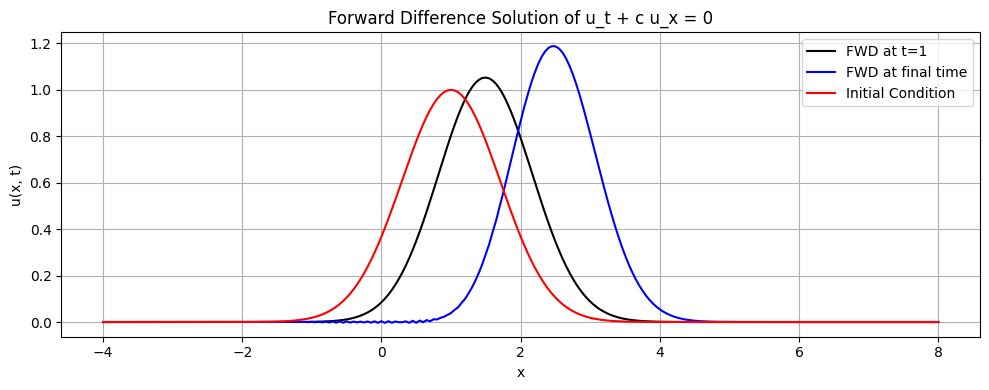

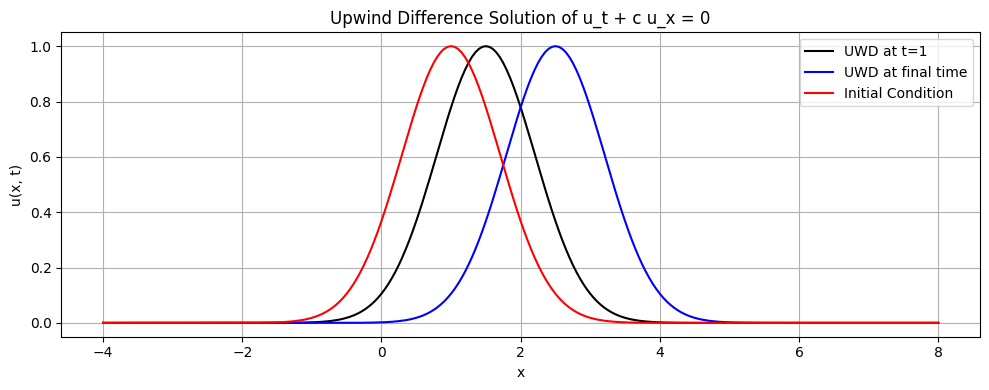

In [9]:
def initial_condition(x):
    return np.exp(-(x - 1) ** 2)

def transport_equation_solver():
    c = 0.5
    deltax = 0.05
    a, b = -4, 8
    x = np.arange(a, b + deltax, deltax)
    m = len(x)

    deltat = 0.1
    r = c * deltat / deltax
    nsteps = 30
    f = initial_condition
    t = 0

    # Initial condition
    u = f(x)

    # ----------- Forward Difference Method (FWD) -----------
    plt.figure(figsize=(10, 4))
    u_fwd = u.copy()
    for n in range(1, nsteps + 1):
        v = u_fwd.copy()
        for i in range(m - 1):
            u_fwd[i] = (1 + r) * v[i] - r * v[i + 1]
        if n == 10:
            plt.plot(x, u_fwd, 'k', label='FWD at t=1')
    plt.plot(x, u_fwd, 'b', label='FWD at final time')
    plt.plot(x, f(x), 'r', label='Initial Condition')
    plt.xlabel("x")
    plt.ylabel("u(x, t)")
    plt.title("Forward Difference Solution of u_t + c u_x = 0")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # ----------- Upwind Difference Method (UWD) -----------
    plt.figure(figsize=(10, 4))
    u_uwd = f(x).copy()
    for n in range(1, nsteps + 1):
        v = u_uwd.copy()
        for i in range(1, m):
            u_uwd[i] = (1 - r) * v[i] + r * v[i - 1]
        if n == 10:
            plt.plot(x, u_uwd, 'k', label='UWD at t=1')
    plt.plot(x, u_uwd, 'b', label='UWD at final time')
    plt.plot(x, f(x), 'r', label='Initial Condition')
    plt.xlabel("x")
    plt.ylabel("u(x, t)")
    plt.title("Upwind Difference Solution of u_t + c u_x = 0")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    transport_equation_solver()